In [1]:
from pyrosm import OSM
from pyrosm import get_data
import openeo
import matplotlib.pyplot as plt

import os

In [2]:
city = "Bonn"

USE_LOCAL = False

In [3]:

if not os.path.exists(os.path.join('data', city)):
    USE_LOCAL = False
if not USE_LOCAL:
    os.makedirs(os.path.join('data', city), exist_ok=True)

In [4]:
# Download data for given city, or load if already downloaded
fp = get_data(city, directory=os.path.join('data', city))
osm = OSM(fp)
print("Loaded OSM data for " + city)

# Filter buildings
buildings = osm.get_buildings()
print("Filtered buildings in " + city)

# Get boundaries of the city
min_x, min_y, max_x, max_y = buildings.total_bounds
print("Coordinates of " + city + ": " + str(min_x),
      str(min_y), str(max_x), str(max_y))

Loaded OSM data for Bonn
Filtered buildings in Bonn
Coordinates of Bonn: 6.800000190734863 50.470001220703125 7.359999179840088 50.900001525878906


In [7]:
connection = openeo.connect("https://openeo.cloud")
# authenticate
connection.authenticate_oidc()
collections = connection.list_collections()
collections

Authenticated using refresh token.


[{'description': 'Optical data collected with airborne drone platform, and processed with MapEO Water software v1 at VITO into turbidity. Turbidity indicates the relative opacity of the water column. It is an optical water property and a measure for the amount of light scattered by constituents in the water column. The higher the scattered light intensity, the higher the turbidity. Constituents that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved coloured organic compounds, plankton, and other microscopic organisms. Turbidity is expressed in Formazin Nephelometric Units (FNU, according to the ISO 7027 standard).',
  'extent': {'spatial': {'bbox': [[-180.0, -84.0, 180.0, 84.0]]},
   'temporal': {'interval': [['2018-02-01T00:00:00Z', None]]}},
  'id': 'MAPEO_WATER_TUR_V1',
  'keywords': ['Orthoimagery',
   'Water quality',
   'Turbidity',
   'Airborne drone data',
   'UAV',
   'RPAS',
   'Drone',
   'MicaSense',
   'DJI',
   'cm resolution',
   'super high resultion',
   'VITO'],
  'license': 'proprietary',
  'links': [{'href': 'https://services.terrascope.be/collectioncatalogue/srv/eng/catalog.search#/metadata/urn:eop:VITO:MAPEO_WATER_TUR_V1',
    'rel': 'alternate',
    'title': 'Collection Catalogue Entry'},
   {'href': 'https://services.terrascope.be/catalogue/catalogue/description.geojson?collection=urn:eop:VITO:MAPEO_WATER_TUR_V1',
    'rel': 'alternate',
    'title': 'OpenSearch entry point'},
   {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
    'rel': 'root'},
   {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
    'rel': 'parent'},
   {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections/MAPEO_WATER_TUR_V1',
    'rel': 'self'}],
  'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.2.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.1.0/schema.json'],
  'stac_version': '0.9.0',
  'title': 'MapEO Water Turbidity (TUR) Products - V1'},
 {'description': 'The EU-DEM v1.1 is a resulting dataset of the EU-DEM v1.0 upgrade which enhances the correction of geo-positioning issues, reducing the number of artefacts, improving the vertical accuracy of EU-DEM using ICESat as reference and ensuring consistency with EU-Hydro public beta.EU-DEM v1.1 is available in Geotiff 32 bits format. It is a contiguous dataset divided into 1000 x 1000 km tiles, at 25m resolution with vertical accuracy: +/- 7 meters RMSE. The tiles have been grouped in big regions:EUDEM2_ASIA (Turkey); EUDEM2_ATLAN (Hondo and Fr_Islands);EUDEM2_BRITAIN (Thames, Shannon and Tweed); EUDEM2_EUROPE_1 (Duero, Ebro, Tajo, Guadalquivir and Jucar); EUDEM2_EUROPE_2 (Tirso, Mesima, Tevere and Po); EUDEM2_EUROPE_3 (Garonne, Rhone, Loire, Seine and western Rhine); EUDEM2_EUROPE_4 (Danube); EUDEM2_EUROPE_5 (Skjern, Nemunas, Vistula, Oder, Elbe and Eastern Rhine); EUDEM2_EUROPE_6 (Bulgaria and Pinios); EUDEM2_ICELAND (Iceland); EUDEM2_SCAND (Vorma, Gota, Angerman, Tana, Kemi and Neva); EUDEM2_SOUTH_AMERICA (Fr_Guiana). EU-DEM v1.1 upgrade was coordinated by the European Environment Agency (EEA) in the frame of the EU Copernicus programme.',
  'extent': {'spatial': {'bbox': [[-54.925613,
      -21.567515,
      93.178583,
      71.89922]]},
   'temporal': {'interval': [['2011-01-01T00:00:00Z',
      '2011-12-31T00:00:00Z']]}},
  'id': 'COP_DEM_EU_25M',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Radar',
   'Elevation',
   'DEM',
   'EUROPE'],
  'license': 'proprietary',
  'links': [{'href': 'https://services.terrascope.be/collectioncatalogue/srv/eng/catalog.search#/metadata/urn:eop:VITO:VITO:COP_DEM_EU_25M',
    'rel': 'alternate',
    'title': 'Collection Catalogue Entry'},
   {'href': 'https://land.copernicus.eu/user-corner/technical-library/eu-dem-v1-1-user-guide',
    'rel': 'alternate',
    'title': 'Online User Documentation'},
   {'href': 'https://land.copernicus.eu/imagery-in-situ/eu-dem/eu-dem-v1.1/view',
    'rel': 'alter

In [32]:
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://collections.eurodatacube.com/sentinel-2-l2a/sentinel-2-l2a.png',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/png'}},
 'crs': ['http://www.opengis.net/def/crs/OGC/1.3/CRS84',
  'http://www.opengis.net/def/crs/EPSG/0/2154',
  'http://www.opengis.net/def/crs/EPSG/0/2180',
  'http://www.opengis.net/def/crs/EPSG/0/2193',
  'http://www.opengis.net/def/crs/EPSG/0/3003',
  'http://www.opengis.net/def/crs/EPSG/0/3004',
  'http://www.opengis.net/def/crs/EPSG/0/3031',
  'http://www.opengis.net/def/crs/EPSG/0/3035',
  'http://www.opengis.net/def/crs/EPSG/0/4326',
  'http://www.opengis.net/def/crs/EPSG/0/4346',
  'http://www.opengis.net/def/crs/EPSG/0/4416',
  'http://www.opengis.net/def/crs/EPSG/0/4765',
  'http://www.opengis.net/def/crs/EPSG/0/4794',
  'http://www.opengis.net/def/crs/EPSG/0/4844',
  'http://www.opengis.net/def/crs/EPSG/0/4857',
  'http://www.opengis.net/def/crs/EPSG/0/3912',
  'http://www.opengis.net/def/crs/EPSG/0/3995',
  'http://www.opengis.net/def/crs/EPSG/0/4026',
  'http://www.opengis.net/def/crs/EPSG/0/5514',
  'http://www.opengis.net/def/crs/EPSG/0/28992',
  'http://www.opengis.net/def/crs/EPSG/0/32601',
  'http://www.opengis.net/def/crs/EPSG/0/32602',
  'http://www.opengis.net/def/crs/EPSG/0/32603',
  'http://www.opengis.net/def/crs/EPSG/0/32604',
  'http://www.opengis.net/def/crs/EPSG/0/32605',
  'http://www.opengis.net/def/crs/EPSG/0/32606',
  'http://www.opengis.net/def/crs/EPSG/0/32607',
  'http://www.opengis.net/def/crs/EPSG/0/32608',
  'http://www.opengis.net/def/crs/EPSG/0/32609',
  'http://www.opengis.net/def/crs/EPSG/0/32610',
  'http://www.opengis.net/def/crs/EPSG/0/32611',
  'http://www.opengis.net/def/crs/EPSG/0/32612',
  'http://www.opengis.net/def/crs/EPSG/0/32613',
  'http://www.opengis.net/def/crs/EPSG/0/32614',
  'http://www.opengis.net/def/crs/EPSG/0/32615',
  'http://www.opengis.net/def/crs/EPSG/0/32616',
  'http://www.opengis.net/def/crs/EPSG/0/32617',
  'http://www.opengis.net/def/crs/EPSG/0/32618',
  'http://www.opengis.net/def/crs/EPSG/0/32619',
  'http://www.opengis.net/def/crs/EPSG/0/32620',
  'http://www.opengis.net/def/crs/EPSG/0/32621',
  'http://www.opengis.net/def/crs/EPSG/0/32622',
  'http://www.opengis.net/def/crs/EPSG/0/32623',
  'http://www.opengis.net/def/crs/EPSG/0/32624',
  'http://www.opengis.net/def/crs/EPSG/0/32625',
  'http://www.opengis.net/def/crs/EPSG/0/32626',
  'http://www.opengis.net/def/crs/EPSG/0/32627',
  'http://www.opengis.net/def/crs/EPSG/0/32628',
  'http://www.opengis.net/def/crs/EPSG/0/32629',
  'http://www.opengis.net/def/crs/EPSG/0/32630',
  'http://www.opengis.net/def/crs/EPSG/0/32631',
  'http://www.opengis.net/def/crs/EPSG/0/32632',
  'http://www.opengis.net/def/crs/EPSG/0/32633',
  'http://www.opengis.net/def/crs/EPSG/0/32634',
  'http://www.opengis.net/def/crs/EPSG/0/32635',
  'http://www.opengis.net/def/crs/EPSG/0/32636',
  'http://www.opengis.net/def/crs/EPSG/0/32637',
  'http://www.opengis.net/def/crs/EPSG/0/32638',
  'http://www.opengis.net/def/crs/EPSG/0/32639',
  'http://www.opengis.net/def/crs/EPSG/0/32640',
  'http://www.opengis.net/def/crs/EPSG/0/32641',
  'http://www.opengis.net/def/crs/EPSG/0/32642',
  'http://www.opengis.net/def/crs/EPSG/0/32643',
  'http://www.opengis.net/def/crs/EPSG/0/32644',
  'http://www.opengis.net/def/crs/EPSG/0/32645',
  'http://www.opengis.net/def/crs/EPSG/0/32646',
  'http://www.opengis.net/def/crs/EPSG/0/32647',
  'http://www.opengis.net/def/crs/EPSG/0/32648',
  'http://www.opengis.net/def/crs/EPSG/0/32649',
  'http://www.opengis.net/def/crs/EPSG/0/32650',
  'http://www.opengis.net/def/crs/EPSG/0/32651',
  'http://www.opengis.net/def/crs/EPSG/0/32652',
  'http://www.opengis.net/def/crs/EPSG/0/32653',
  'http://www.opengis.net/def/crs/EPSG/0/32654',
  'http://www.opengis.net/def/crs/EPSG/0/32655',
  'http://www.opengis.net/def/crs/EPSG/0/32656',
  'http://www.opengis.net/def/crs/EPSG/0/32657',
  'http://www.opengis.net/def/crs/EPSG/0/32658',
  

In [42]:
import openeo.util
from openeo.processes import ProcessBuilder
def scale_function(x: ProcessBuilder):
    return x.linear_scale_range(0, 8000, 0, 255)

if not USE_LOCAL:  
    

    # define time
    temporal_extent = ["2023-05-01", "2024-09-30"]

    # define coordinates
    bbox = {"west": min_x, "south": min_y, "east": max_x, "north": max_y}

    # define the collection ID
    collection_id = "SENTINEL2_L2A"

    # define bands
    # ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'SCL', 'SNW', 'CLD', 'CLP', 'CLM', 'sunAzimuthAngles', 'sunZenithAngles', 'viewAzimuthMean', 'viewZenithMean', 'dataMask']
    bands = ["B04", "B03", "B02", ]

    # load the data collection
    datacube = connection.load_collection(
        collection_id=collection_id,
        spatial_extent=bbox,
        temporal_extent=temporal_extent,
        bands=bands,
        max_cloud_cover=10
    )

    # merge temporal dimension
    # datacube = datacube.reduce_temporal("median")

    # blue = datacube.band("B02") * 0.0001
    # red = datacube.band("B04") * 0.0001
    # green = datacube.band("B03") * 0.0001
    
    # blue = blue.reduce_temporal("median")
    # red = red.reduce_temporal("median")
    # green = green.reduce_temporal("median")

    # datacube.band("B02", blue)
    # datacube.band("B04", red)
    # datacube.band("B03", green)

    # display(blue)

    # display the data
    datacube_scale = datacube.apply(scale_function)
    datacube_scale_reduced = datacube_scale.reduce_temporal("median")

    # create cloud mask


    display(datacube_scale_reduced)
    # save the data as TIFF files
    datacube_scale_reduced.download(os.path.join(
        "data", city, "satellite_data.tiff"), format="GTiff")

In [ ]:
import openeo

# First, we connect to the back-end and authenticate.
con = openeo.connect("openeo.dataspace.copernicus.eu")
con.authenticate_oidc()

# Now that we are connected, we can initialize our datacube object with the area of interest
# and the time range of interest using Sentinel 1 data.
datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": 5.14, "south": 51.17,
                    "east": 5.17, "north": 51.19},
    temporal_extent=["2021-02-01", "2021-04-30"],
    bands=["B02", "B04", "B08"],
    max_cloud_cover=85,
)

# By filtering as early as possible (directly in load_collection() in this case),
# we make sure the back-end only loads the data we are interested in and avoid incurring unneeded costs.


# From this data cube, we can now select the individual bands with the DataCube.band() method and rescale the digital number values to physical reflectances:
blue = sentinel2_cube.band("B02") * 0.0001
red = sentinel2_cube.band("B04") * 0.0001
nir = sentinel2_cube.band("B08") * 0.0001


# We now want to compute the enhanced vegetation index and can do that directly with these band variables:
evi_cube = 2.5 * (nir - red) / (nir + 6.0 * red - 7.5 * blue + 1.0)

# Now we can use the compact “band math” feature again to build a binary mask with a simple comparison operation:
# Select the "SCL" band from the data cube
scl_band = s2_scl.band("SCL")
# Build mask to mask out everything but class 4 (vegetation)
mask = (scl_band != 4)

# Before we can apply this mask to the EVI cube we have to resample it, as the “SCL” layer has a “ground sample distance” of 20 meter, while it is 10 meter for the “B02”, “B04” and “B08” bands. We can easily do the resampling by referring directly to the EVI cube.
mask_resampled = mask.resample_cube_spatial(evi_cube)

# Apply the mask to the `evi_cube`
evi_cube_masked = evi_cube.mask(mask_resampled)

# Because GeoTIFF does not support a temporal dimension, we first eliminate it by taking the temporal maximum value for each pixel:
evi_composite = evi_cube.max_time()

# Now we can download this to a local file:
evi_composite.download("evi-composite.tiff")

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 4080, 'height': 4885, 'count': 3, 'crs': CRS.from_epsg(32632), 'transform': Affine(10.0, 0.0, 343880.0,
       0.0, -10.0, 5641020.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


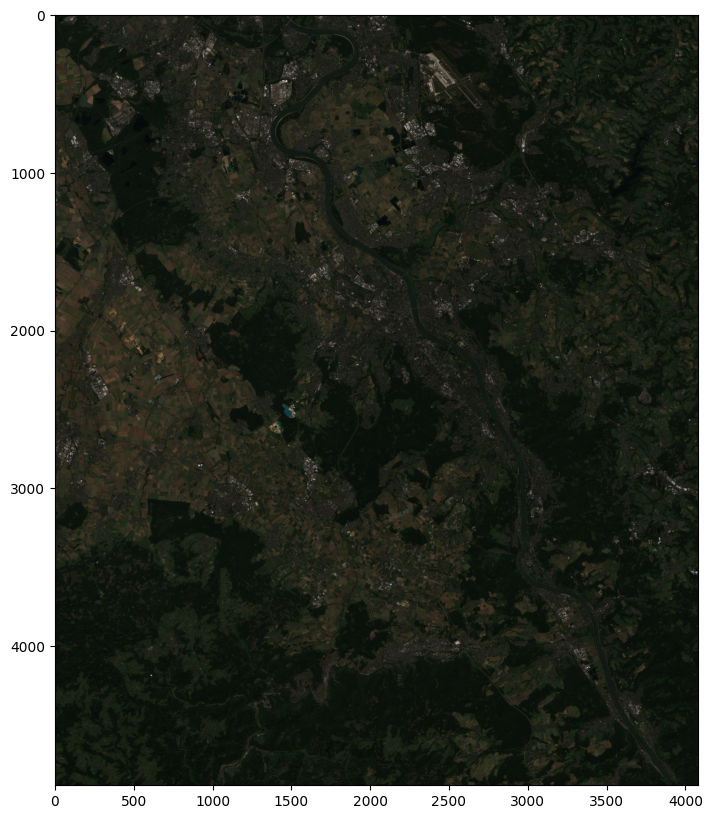

In [41]:
import rasterio
from rasterio.plot import show
import numpy as np

path = "./data/Bonn/satellite_data.tiff"

with rasterio.open(path) as src:
    data = src.read()
    profile = src.profile
    print(profile)
    # plot
    fig, ax = plt.subplots(figsize=(10, 10))
    show(data, ax=ax)
    plt.show()
